<a href="https://colab.research.google.com/github/adarshh347/Basics-of-ML/blob/main/Practice_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# ML1 ✅
Build Embedding-only class — Class creation, nn.Embedding, nn.Parameter


In [ ]:
# Embeddings -> vectors for tokens

In [ ]:
# TEST CASE
# Create an instance
vocab_size = 10
embedding_dim = 4 # each word is a 4-dim vector
# model = EmbeddingOnlyWithParameter(vocab_size, embedding_dim)

# Create fake input: batch of token IDs
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # shape: (batch_size=2, seq_len=3)




In [ ]:
# Forward pass

out = model(x)

print("Input indices:\n", x)
print("Output embeddings:\n", out)
print("Output shape:", out.shape)  # should be (2, 3, 4)

Input indices:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Output embeddings:
 tensor([[[-0.5413, -0.5778,  0.5416,  0.0823],
         [ 3.1888,  1.0835, -0.7186, -0.6059],
         [-1.0780, -0.4865,  0.9683,  0.2116]],

        [[ 0.2029, -0.1791,  0.2834,  0.4738],
         [-2.5292, -0.9218,  1.4993,  2.3651],
         [ 0.4634, -1.0392, -1.8511, -1.9382]]], grad_fn=<EmbeddingBackward0>)
Output shape: torch.Size([2, 3, 4])


In [ ]:
# METHOD 1
# "Embedding-only" means: the class should be just about storing embeddings (vectors for tokens), no complicated layers like LSTM, CNN, etc.
# Class creation: you need to create a custom class in Python that probably inherits from nn.Module

class MyEmbeddingClass(nn.Module):
  def __init__(self,vocab_size,embedding_dim):
    super().__init__ ()         # Important! Initialize parent
    self.embd = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

  def forward(self,x):
    return self.embd(x)

model = MyEmbeddingClass(vocab_size,embedding_dim)


In [ ]:
# Forward pass

out = model(x)

print("Input indices:\n", x)
print("Output embeddings:\n", out)
print("Output shape:", out.shape)  # should be (2, 3, 4)

Input indices:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Output embeddings:
 tensor([[[-0.5413, -0.5778,  0.5416,  0.0823],
         [ 3.1888,  1.0835, -0.7186, -0.6059],
         [-1.0780, -0.4865,  0.9683,  0.2116]],

        [[ 0.2029, -0.1791,  0.2834,  0.4738],
         [-2.5292, -0.9218,  1.4993,  2.3651],
         [ 0.4634, -1.0392, -1.8511, -1.9382]]], grad_fn=<EmbeddingBackward0>)
Output shape: torch.Size([2, 3, 4])


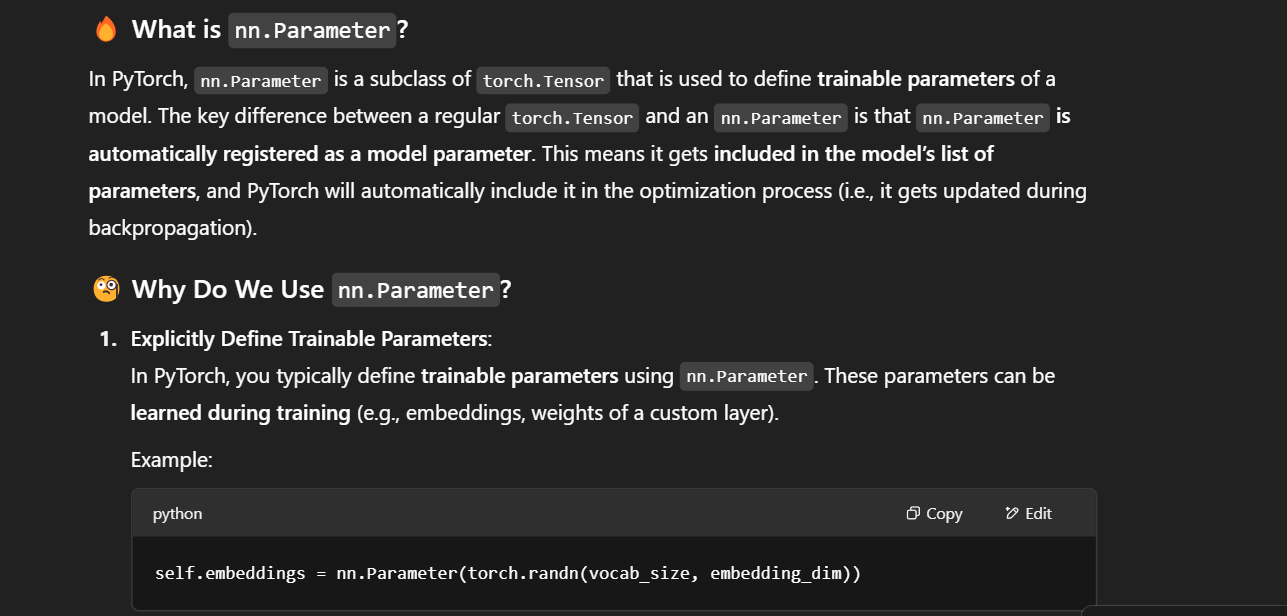

In [ ]:
# METHOD 2
class EmbeddingOnlywithParameter(nn.Module):
  def __init__(self,vocab_size,embedding_dim):
    super().__init__()
    self.embd = nn.Parameter(torch.randn(vocab_size,embedding_dim))

  def forward(self,x):
    return self.embd[x]
model = EmbeddingOnlywithParameter(vocab_size,embedding_dim)


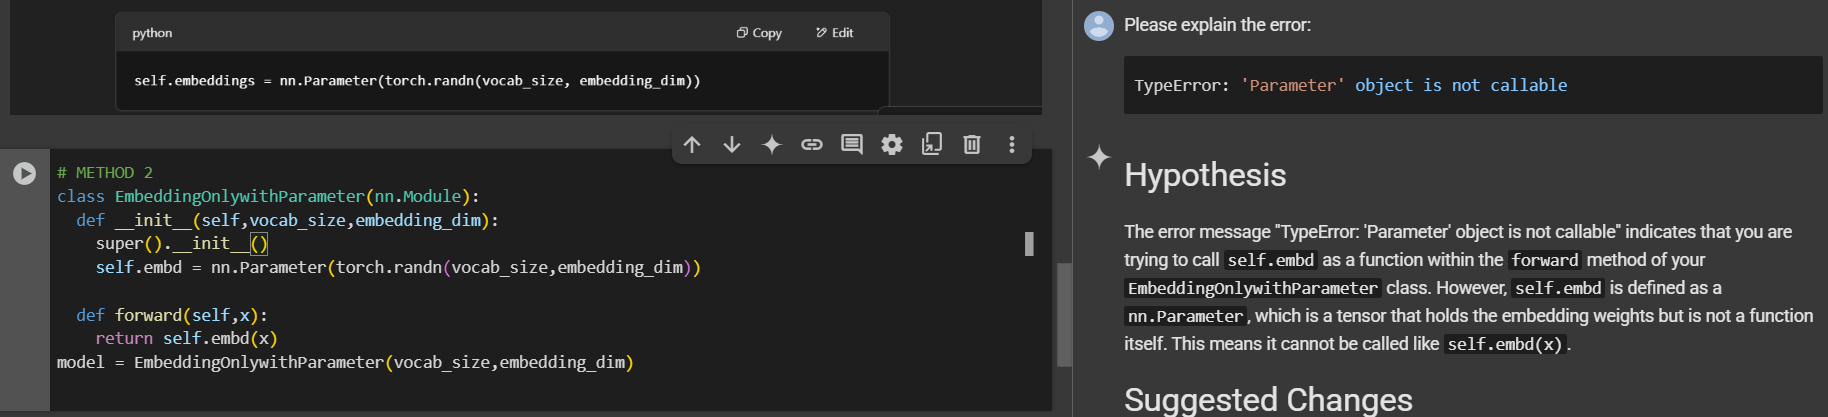

In [ ]:
# Forward pass

out = model(x)

print("Input indices:\n", x)
print("Output embeddings:\n", out)
print("Output shape:", out.shape)  # should be (2, 3, 4)

Input indices:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Output embeddings:
 tensor([[[-0.5694, -0.0390, -0.5581,  0.0219],
         [-1.3899, -0.5421, -0.0203,  1.6257],
         [ 0.4357, -2.2818, -0.6596, -0.6932]],

        [[ 1.0406, -0.0122,  0.0210, -0.7430],
         [ 1.2707,  0.3774, -0.2825,  0.2812],
         [-0.0285, -0.1071,  0.4863, -1.5368]]], grad_fn=<IndexBackward0>)
Output shape: torch.Size([2, 3, 4])


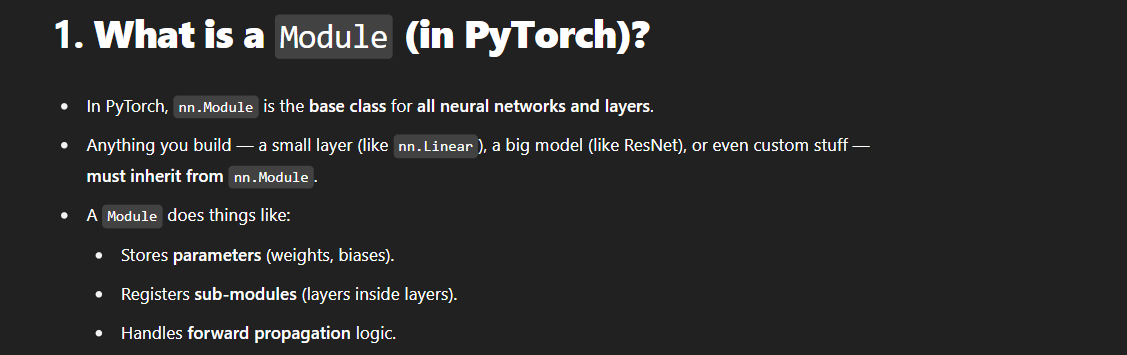

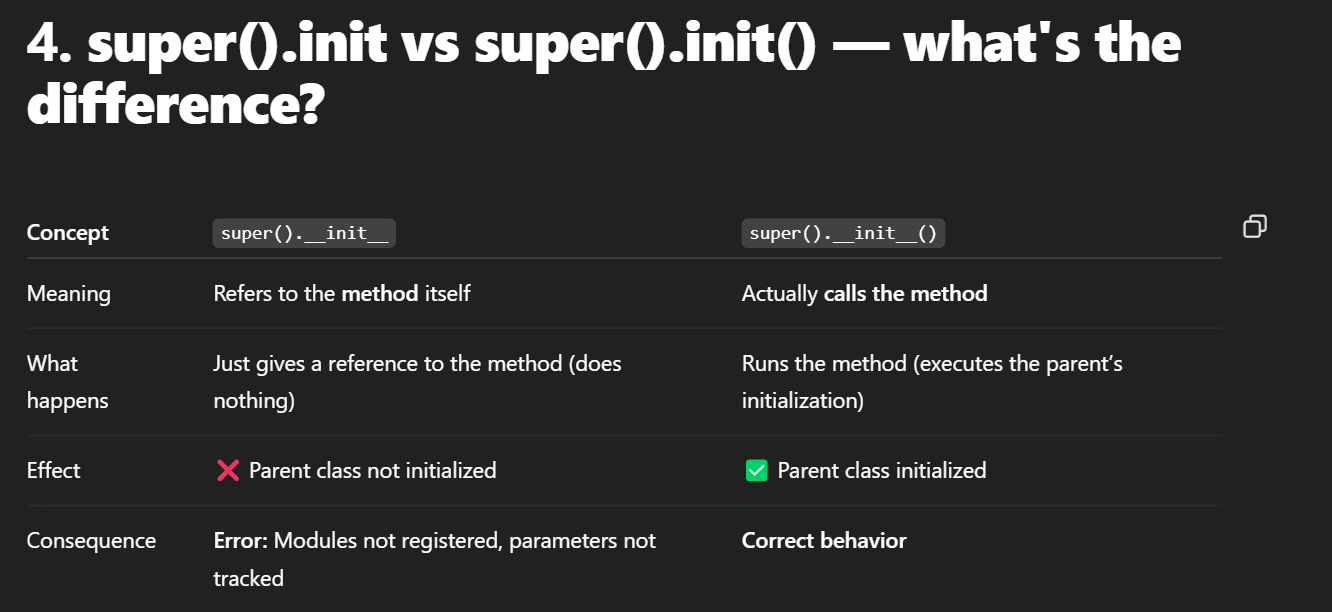

# ML2 ✅
Custom Embedding Lookup with nn.Parameter

Create a Custom Embedding Layer:

*   Use nn.Parameter to create trainable embeddings.
*   Apply a ReLU activation to the embeddings before looking them up based on token indices.
*   Forward Function:
*   Apply the ReLU activation on the embeddings before returning the embeddings based on input token indices.














In [ ]:
# Input tensor: batch of token indices
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
vocab_size=7           # what is vocab_size
embedding_dim=4
# Expected Output:
# Shape: (batch_size=2, seq_len=3, embedding_dim=4)

# All embedding values will be non-negative due to ReLU transformation.

In [ ]:
class CustomEmbeddingClass(nn.Module):
  def __init__(self, vocab_size, embedding_dim):
    super().__init__()
    self.embd = nn.Parameter(torch.randn(vocab_size,embedding_dim))
  def forward(self,x):
    return F.relu(self.embd[x])

In [ ]:
model = CustomEmbeddingClass(vocab_size,embedding_dim)
print(ans:=model(x))

tensor([[[2.2064, 1.7456, 0.0000, 1.3299],
         [0.3556, 0.0000, 1.9190, 0.0000],
         [0.2005, 0.6617, 0.3420, 1.2687]],

        [[0.0000, 0.0000, 0.2690, 0.0000],
         [0.8973, 0.0000, 0.1714, 0.0000],
         [1.5229, 1.0007, 0.7170, 0.1398]]], grad_fn=<ReluBackward0>)


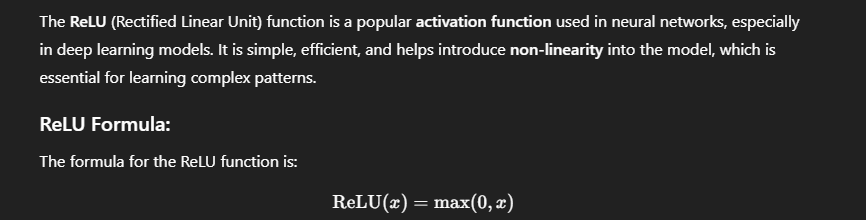

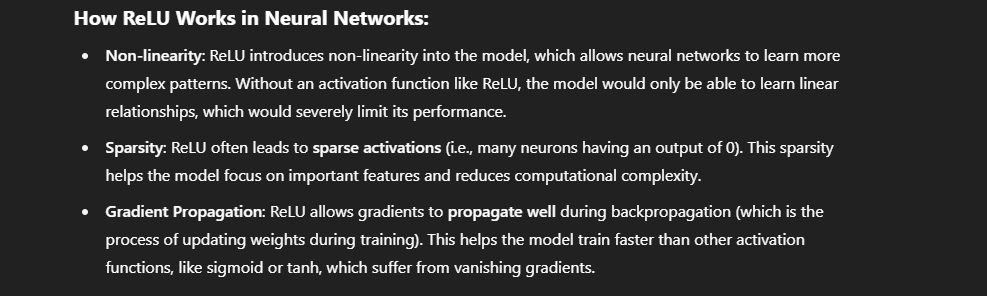

# ML3 (incomp)

Transformer-like Positional Embedding Update (Using nn.Parameter)
Objective:


*   You will implement a simple transformer-like positional encoding, where you update the embedding weights and positional encodings (initialized via nn.Parameter)

*   And then observe the backpropagation flow.





In [ ]:
# Input tensor: batch of token indices
x = torch.tensor([[1, 2], [3, 4]])
import torch.optim as optim


In [ ]:
class TransformerPositionalEmbedding(nn.Module):
  def __init__(self, vocab_size,embedding_dim,seq_len):
    super().__init__()
    self.embd = nn.Parameter(torch.randn(vocab_size, embedding_dim))
    self.posn_embd = nn.Parameter(torch.randn(vocab_size, embedding_dim))
  def forward(self,x):
    return self.embd[x] + self.posn_embd[x]


In [ ]:
model=TransformerPositionalEmbedding(vocab_size=6,embedding_dim=2,seq_len=2)
print(output:=model(x))

tensor([[[-1.0436, -0.1946],
         [ 1.8875, -0.0496]],

        [[-1.4763,  0.3165],
         [-0.9375,  0.0959]]], grad_fn=<AddBackward0>)


In [ ]:
# random target, criterion(MSE), loss
target = torch.randn_like(output)

print(target)


tensor([[[-0.7022, -0.9523],
         [-0.6904, -0.7982]],

        [[ 1.0793,  1.6199],
         [-0.8790,  1.4914]]])


In [ ]:
criterion = nn.MSELoss()
loss=criterion(output,target)

In [ ]:
# Backpropagation
optimizer= optim.SGD(model.parameters(),lr=0.01)
optimizer.zero_grad()
loss.backward(retain_graph=True)
optimizer.step()

print("updated token embeddings", model.embd)
print("updated token embeddings", model.posn_embd)


updated token embeddings Parameter containing:
tensor([[-0.0438,  1.6898],
        [-0.1937,  0.3260],
        [ 2.8083,  0.0549],
        [-0.4284, -1.3148],
        [ 0.2794, -0.2007],
        [-0.3311,  1.1335]], requires_grad=True)
updated token embeddings Parameter containing:
tensor([[-0.1104, -0.0528],
        [-0.8482, -0.5244],
        [-0.9337, -0.1083],
        [-1.0351,  1.6378],
        [-1.2166,  0.3036],
        [-1.0936,  0.1915]], requires_grad=True)


In [ ]:
# Backpropagation 2nd
# optimizer= optim.SGD(model.parameters(),lr=0.01)
# optimizer.zero_grad()
loss.backward(retain_graph=True)
optimizer.step()

print("updated token embeddings", model.embd)
print("updated token embeddings", model.posn_embd)


updated token embeddings Parameter containing:
tensor([[-0.0438,  1.6898],
        [-0.1920,  0.3222],
        [ 2.7954,  0.0512],
        [-0.4156, -1.3083],
        [ 0.2797, -0.1938],
        [-0.3311,  1.1335]], requires_grad=True)
updated token embeddings Parameter containing:
tensor([[-0.1104, -0.0528],
        [-0.8465, -0.5282],
        [-0.9466, -0.1120],
        [-1.0223,  1.6443],
        [-1.2163,  0.3106],
        [-1.0936,  0.1915]], requires_grad=True)


# ML 4
Sequence-to-Sequence Model with nn.Embedding (Encoder-Decoder Setup)


*   In a sequence-to-sequence model, we’ll use nn.Embedding to handle word embeddings, and train the model to learn to map an input sequence to an output sequence (e.g., an encoder-decoder architecture).
   



In [ ]:
# Input and output sequences (Token indices)
input_seq = torch.tensor([[1, 2, 3], [4, 5, 6]])
output_seq = torch.tensor([[7, 8, 9], [10, 11, 12]])


# ML 5
Autoregressive Model with nn.Parameter for Custom Embedding Layer


*   You’ll build an autoregressive model that generates sequences. You’ll manually manage embeddings using nn.Parameter for flexibility in custom initialization and updates, to simulate control over model parameters like you’d see in architectures such as GPT.




In [ ]:
# Input sequence of token indices
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Output sequence of token indices (target for teacher-forcing)
target = torch.tensor([[7, 8, 9], [10, 11, 12]])
